In [7]:
#import googlemaps
#import pprint
import time
import sys
import pandas as pd
import json
import datetime

In [4]:
from apiK import *

In [5]:
# This is the unique id of a place in Google maps
place_id = 'ChIJrVO2iWhEXUgRkKJMnRdAmSc'

In [6]:
# Define our API key
API_KEY = api_key()

In [7]:
# Define our clients
gmaps = googlemaps.Client(key = API_KEY) # authenticate to make a request

In [10]:
# Define the fields we want sent back to us
# page to see fields: https://developers.google.com/maps/documentation/places/web-service/details
my_fields = ['business_status', 'formatted_address', 'name', 'opening_hours', 'plus_code', 'price_level', 'rating','review', 'type', 'url', 'user_ratings_total', 'vicinity', 'website']

In [11]:
# make a request for the details
place_details = gmaps.place(place_id = place_id, fields = my_fields)

In [12]:
# This is what the call gives back to us
place_details

{'html_attributions': [],
 'result': {'business_status': 'OPERATIONAL',
  'formatted_address': 'Main St, Ballyknockan, Leighlinbridge, Co. Carlow, R93 E189, Ireland',
  'name': 'Lord Bagenal Inn',
  'opening_hours': {'open_now': True,
   'periods': [{'open': {'day': 0, 'time': '0000'}}],
   'weekday_text': ['Monday: Open 24 hours',
    'Tuesday: Open 24 hours',
    'Wednesday: Open 24 hours',
    'Thursday: Open 24 hours',
    'Friday: Open 24 hours',
    'Saturday: Open 24 hours',
    'Sunday: Open 24 hours']},
  'plus_code': {'compound_code': 'P2PF+H8 Leighlinbridge, County Carlow, Ireland',
   'global_code': '9C4MP2PF+H8'},
  'rating': 4.5,
  'reviews': [{'author_name': 'moonshineminx1',
    'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5oc7z1RB5O_w8lAoxS5Mz-GS5VEoGYjVEamLJ_=s128-c0x00000000-cc-rp-mo',
    'rating': 5,
    'rel

In [4]:
# Saving everything in results, to not run the call again
fetch_result = {'html_attributions': [],
 'result': {'business_status': 'OPERATIONAL',
  'formatted_address': 'Main St, Ballyknockan, Leighlinbridge, Co. Carlow, R93 E189, Ireland',
  'name': 'Lord Bagenal Inn',
  'opening_hours': {'open_now': True,
   'periods': [{'open': {'day': 0, 'time': '0000'}}],
   'weekday_text': ['Monday: Open 24 hours',
    'Tuesday: Open 24 hours',
    'Wednesday: Open 24 hours',
    'Thursday: Open 24 hours',
    'Friday: Open 24 hours',
    'Saturday: Open 24 hours',
    'Sunday: Open 24 hours']},
  'plus_code': {'compound_code': 'P2PF+H8 Leighlinbridge, County Carlow, Ireland',
   'global_code': '9C4MP2PF+H8'},
  'rating': 4.5,
  'reviews': [{'author_name': 'moonshineminx1',
    'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5oc7z1RB5O_w8lAoxS5Mz-GS5VEoGYjVEamLJ_=s128-c0x00000000-cc-rp-mo',
    'rating': 5,
    'relative_time_description': '5 months ago',
    'text': "We had a first class meal - both took the battered hake. The fish was delicious, large portion, light batter, really enjoyed it. The surroundings are full of character, the meal arrived quickly and the staff were really helpful and attentive. We'll definately go back next time we're in the area.",
    'time': 1661808204,
    'translated': False},
   {'author_name': 'Amy Brennan',
    'author_url': 'https://www.google.com/maps/contrib/101208999719543819132/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a-/AD5-WCmzReTr_Os5HJFS7n0-StUwF46DFgdnGeLctHCdMA=s128-c0x00000000-cc-rp-mo',
    'rating': 5,
    'relative_time_description': '3 months ago',
    'text': 'A world class hotel! Beautiful and classically decorated. Service was outstanding. Staff were\nprofessional, attentive & kind; went above and beyond to cater to us. Food was delicious, bed super comfy and facilities brilliant. Will be back!',
    'time': 1669029025,
    'translated': False},
   {'author_name': 'Martin Kyle Jensen Kellerman',
    'author_url': 'https://www.google.com/maps/contrib/100432243203795625555/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a-/AD5-WCmlPf6sZBGl8Zw9Da2GLvSUyfp-F4Ia7kaeW-toPw=s128-c0x00000000-cc-rp-mo',
    'rating': 5,
    'relative_time_description': '5 months ago',
    'text': 'Always a pleasure to visit. The restaurant has amazing staff. Excellent choices on the menu with fresh produce. You can see a lot of love and attention that goes into their menus, taste and service',
    'time': 1663083430,
    'translated': False},
   {'author_name': 'Robert McGivern',
    'author_url': 'https://www.google.com/maps/contrib/112588598986974491135/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a-/AD5-WCnNYBQYQ4ndnAup1wIb0sVNBxsEhUtzLu24BN77=s128-c0x00000000-cc-rp-mo-ba3',
    'rating': 4,
    'relative_time_description': '4 months ago',
    'text': 'Spent a week long break in the area,\nand were here three times for food.\nSunday carvery is quite good, also evening menu, which we sampled twice.\nStaff very nice and helpful.',
    'time': 1664272635,
    'translated': False},
   {'author_name': 'Eileen Carr',
    'author_url': 'https://www.google.com/maps/contrib/115481605440957449984/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5j4rd1Tm8iSe8rqO366WXsCHbTlJrPiuCoJopy=s128-c0x00000000-cc-rp-mo',
    'rating': 4,
    'relative_time_description': '5 months ago',
    'text': 'Great food & service. Pleasant staff. I had the Thai sea bass - really good -  would have loved a few stir fried veg with it but the fish was yummy.',
    'time': 1663533414,
    'translated': False}],
  'types': ['cafe',
   'bar',
   'lodging',
   'restaurant',
   'point_of_interest',
   'food',
   'establishment'],
  'url': 'https://maps.google.com/?cid=2853382309083390608',
  'user_ratings_total': 1418,
  'vicinity': 'Main Street, Leighlinbridge',
  'website': 'http://www.lordbagenal.com/'},
 'status': 'OK'}

In [6]:
fetch_result

{'html_attributions': [],
 'result': {'business_status': 'OPERATIONAL',
  'formatted_address': 'Main St, Ballyknockan, Leighlinbridge, Co. Carlow, R93 E189, Ireland',
  'name': 'Lord Bagenal Inn',
  'opening_hours': {'open_now': True,
   'periods': [{'open': {'day': 0, 'time': '0000'}}],
   'weekday_text': ['Monday: Open 24 hours',
    'Tuesday: Open 24 hours',
    'Wednesday: Open 24 hours',
    'Thursday: Open 24 hours',
    'Friday: Open 24 hours',
    'Saturday: Open 24 hours',
    'Sunday: Open 24 hours']},
  'plus_code': {'compound_code': 'P2PF+H8 Leighlinbridge, County Carlow, Ireland',
   'global_code': '9C4MP2PF+H8'},
  'rating': 4.5,
  'reviews': [{'author_name': 'moonshineminx1',
    'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
    'language': 'en',
    'original_language': 'en',
    'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5oc7z1RB5O_w8lAoxS5Mz-GS5VEoGYjVEamLJ_=s128-c0x00000000-cc-rp-mo',
    'rating': 5,
    'rel

In [7]:
# Check the values of the place fetch 
for res in fetch_result:
    print(res)

html_attributions
result
status


In [8]:
# We only want the result 
for res in fetch_result['result']:
    print(res) # This are all the fields that we asked for (if such value exists)

business_status
formatted_address
name
opening_hours
plus_code
rating
reviews
types
url
user_ratings_total
vicinity
website


In [9]:
# We can print them one by one like this
print(fetch_result['result']['business_status'])

OPERATIONAL


# Format Values one by one

## business_status

In [10]:
print(fetch_result['result']['business_status'])

OPERATIONAL


## formatted_address

In [11]:
print(fetch_result['result']['formatted_address'])

Main St, Ballyknockan, Leighlinbridge, Co. Carlow, R93 E189, Ireland


## name

In [12]:
print(fetch_result['result']['name'])

Lord Bagenal Inn


## opening_hours

In [13]:
opening_hours = fetch_result['result']['opening_hours']
opening_hours

{'open_now': True,
 'periods': [{'open': {'day': 0, 'time': '0000'}}],
 'weekday_text': ['Monday: Open 24 hours',
  'Tuesday: Open 24 hours',
  'Wednesday: Open 24 hours',
  'Thursday: Open 24 hours',
  'Friday: Open 24 hours',
  'Saturday: Open 24 hours',
  'Sunday: Open 24 hours']}

## plus_code

In [6]:
plus_code = fetch_result['result']['plus_code']
plus_code

{'compound_code': 'P2PF+H8 Leighlinbridge, County Carlow, Ireland',
 'global_code': '9C4MP2PF+H8'}

## rating

In [7]:
rating = fetch_result['result']['rating']
rating

4.5

## reviews

In [5]:
reviews = fetch_result['result']['reviews']
reviews

[{'author_name': 'moonshineminx1',
  'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
  'language': 'en',
  'original_language': 'en',
  'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5oc7z1RB5O_w8lAoxS5Mz-GS5VEoGYjVEamLJ_=s128-c0x00000000-cc-rp-mo',
  'rating': 5,
  'relative_time_description': '5 months ago',
  'text': "We had a first class meal - both took the battered hake. The fish was delicious, large portion, light batter, really enjoyed it. The surroundings are full of character, the meal arrived quickly and the staff were really helpful and attentive. We'll definately go back next time we're in the area.",
  'time': 1661808204,
  'translated': False},
 {'author_name': 'Amy Brennan',
  'author_url': 'https://www.google.com/maps/contrib/101208999719543819132/reviews',
  'language': 'en',
  'original_language': 'en',
  'profile_photo_url': 'https://lh3.googleusercontent.com/a-/AD5-WCmzReTr_Os5HJFS7n0-StUwF46DFgdnGeLctHCdMA=s128-c

In [5]:
# Work with one review
reviews[0]

{'author_name': 'moonshineminx1',
 'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
 'language': 'en',
 'original_language': 'en',
 'profile_photo_url': 'https://lh3.googleusercontent.com/a/AEdFTp5oc7z1RB5O_w8lAoxS5Mz-GS5VEoGYjVEamLJ_=s128-c0x00000000-cc-rp-mo',
 'rating': 5,
 'relative_time_description': '5 months ago',
 'text': "We had a first class meal - both took the battered hake. The fish was delicious, large portion, light batter, really enjoyed it. The surroundings are full of character, the meal arrived quickly and the staff were really helpful and attentive. We'll definately go back next time we're in the area.",
 'time': 1661808204,
 'translated': False}

In [6]:
# All fields from a single review
for rev_field in reviews[0]:
    print(rev_field)

author_name
author_url
language
original_language
profile_photo_url
rating
relative_time_description
text
time
translated


In [3]:
data_single_review = { 'author_name': 'moonshineminx1',
                      'author_url': 'https://www.google.com/maps/contrib/109720901335390464538/reviews',
                      'language': 'en'
                     }

In [8]:
# Creating pandas dataframe
reviews = fetch_result['result']['reviews']
reviews_json = json.dumps(reviews) 
reviews_df = pd.read_json(reviews_json)

In [9]:
reviews_df

,author_name,author_url,language,original_language,profile_photo_url,rating,relative_time_description,text,time,translated
0,moonshineminx1,https://www.google.com/maps/contrib/1097209013...,en,en,https://lh3.googleusercontent.com/a/AEdFTp5oc7...,5,5 months ago,We had a first class meal - both took the batt...,1661808204,False
1,Amy Brennan,https://www.google.com/maps/contrib/1012089997...,en,en,https://lh3.googleusercontent.com/a-/AD5-WCmzR...,5,3 months ago,A world class hotel! Beautiful and classically...,1669029025,False
2,Martin Kyle Jensen Kellerman,https://www.google.com/maps/contrib/1004322432...,en,en,https://lh3.googleusercontent.com/a-/AD5-WCmlP...,5,5 months ago,Always a pleasure to visit. The restaurant has...,1663083430,False
3,Robert McGivern,https://www.google.com/maps/contrib/1125885989...,en,en,https://lh3.googleusercontent.com/a-/AD5-WCnNY...,4,4 months ago,"Spent a week long break in the area,\nand were...",1664272635,False
4,Eileen Carr,https://www.google.com/maps/contrib/1154816054...,en,en,https://lh3.googleusercontent.com/a/AEdFTp5j4r...,4,5 months ago,Great food & service. Pleasant staff. I had th...,1663533414,False


In [10]:
reviews_df_clean = reviews_df.drop(['author_url', 'language', 'time', 'profile_photo_url'], axis=1)
reviews_df_clean

,author_name,original_language,rating,relative_time_description,text,translated
0,moonshineminx1,en,5,5 months ago,We had a first class meal - both took the batt...,False
1,Amy Brennan,en,5,3 months ago,A world class hotel! Beautiful and classically...,False
2,Martin Kyle Jensen Kellerman,en,5,5 months ago,Always a pleasure to visit. The restaurant has...,False
3,Robert McGivern,en,4,4 months ago,"Spent a week long break in the area,\nand were...",False
4,Eileen Carr,en,4,5 months ago,Great food & service. Pleasant staff. I had th...,False


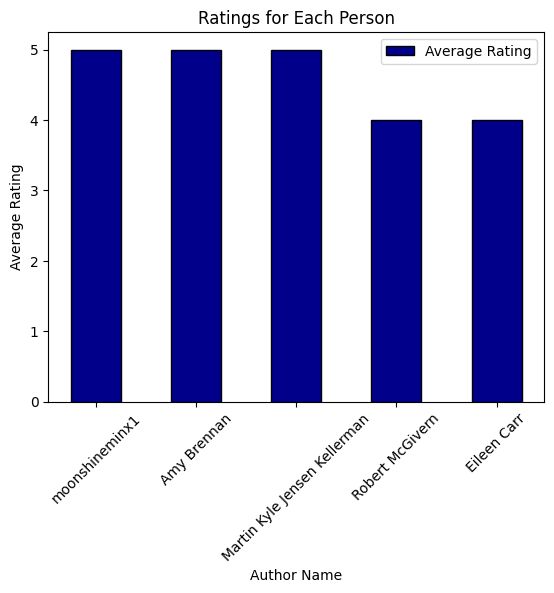

In [11]:
import matplotlib.pyplot as plt

# Create a list of unique author names
author_names = list(reviews_df_clean['author_name'].unique())

# Create an empty dictionary to store average ratings for each author
author_ratings = {}

# Loop through each author name in the list
for author in author_names:
  # Filter the dataset by the author name
  author_reviews = reviews_df_clean[reviews_df_clean['author_name'] == author]
  # Calculate the average rating for the author
  average_rating = author_reviews['rating'].mean()
  # Store the average rating in the dictionary
  author_ratings[author] = average_rating

# Create a figure and an axis object
fig, ax = plt.subplots()

# Create a bar chart with author names on the x-axis and average ratings on the y-axis
ax.bar(author_ratings.keys(), author_ratings.values(), color='darkblue', width=0.5, edgecolor='black')
# Add labels and title to the chart
ax.set_xlabel('Author Name')
ax.set_ylabel('Average Rating')
ax.set_title('Ratings for Each Person')
# Remove grid lines from the chart
ax.grid(False)
# Add a legend to the chart
ax.legend(['Average Rating'])
# Adjust the size and rotation of the x-axis labels
plt.xticks(rotation=45, fontsize=10)
# Show the chart
plt.show()

In [12]:
import plotly.express as px

author_names = list(reviews_df_clean['author_name'].unique())

author_ratings = {}

for author in author_names:
    author_reviews = reviews_df_clean[reviews_df_clean['author_name'] == author]
    average_rating = author_reviews['rating'].mean()
    author_ratings[author] = average_rating
    ratings_df = pd.DataFrame.from_dict(author_ratings, orient='index', columns=['Average Rating'])

fig = px.bar(ratings_df, x=ratings_df.index, y='Average Rating', color='Average Rating', title='Ratings for Each Person')

fig.show()

ModuleNotFoundError: No module named 'plotly'

## types

In [8]:
types = fetch_result['result']['types']
types

['cafe',
 'bar',
 'lodging',
 'restaurant',
 'point_of_interest',
 'food',
 'establishment']

## url

In [28]:
print(fetch_result['result']['url'])

https://maps.google.com/?cid=2853382309083390608


## user_ratings_total

In [29]:
print(fetch_result['result']['user_ratings_total'])

1418


## vicinity

In [30]:
print(fetch_result['result']['vicinity'])

Main Street, Leighlinbridge


## website

In [31]:
print(fetch_result['result']['website'])

http://www.lordbagenal.com/


## Felix

NameError: name 'df' is not defined

In [ ]:
# Parse response text as json object
fetch_result_2 = response.json()

# Flatten json object into dataframe
fetch_result = pd.json_normalize(data["result"])

# Select columns you want (optional)
fetch_result = fetch_result[["author_name", "author_url", "language", "types"]]